<a href="https://colab.research.google.com/github/HBocaccio/NumLabIMC/blob/main/Colabs/nb10_DiferenciasFinitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico 2024

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab

En el 1er eje temático de la materia vimos ecuaciones diferenciales ordinarias (ODEs), que describían la dinámica de variables continuas que dependían sólo del tiempo, es decir, cada una de las variables podía representarse con una función univariada (depende de una única variable). De esta manera, las ODEs que describían un sistema autónomo (el tiempo no aparece explícitamente en la ecuación) se escribían como $\dot{\vec{x}}(t) = \vec{f}(\vec{x})$. En el caso más simple, el 1D, teníamos una única variable descrita por una única ODE:

$$
\dot{x}(t) = f(x)
$$

Este sistema los podíamos resolver integrando numéricamente de manera tal de obtener la solución $x(t)$ en el marco de los problemas de valores iniciales.

En este eje temático vamos a abordar un problema distinto, que consiste en tener variables continuas que se representan como funciones multivariadas $u(x,t)$. De esta manera, la derivada respecto de una de sus variables ya no es la derivada total, si no que es una derivada parcial. Ahora las reglas que describen la evolución temporal de estas variables ya no son ODEs, si no que son **ecuaciones en derivadas parciales** (PDEs), que son básicamente ecuaciones que relacionan funciones multivariadas y sus derivadas parciales. La resolución de este tipo de sistemas se encuadra en el marco de problemas de condiciones de borde, siendo un caso particular la consideración de condiciones iniciales cuando una de las variables es el tiempo.

Las PDEs son fundamentales en muchas áreas de la física y las matemáticas aplicadas, describiendo muchísimos fenómenos diversos. La resolución de estos sistemas se vuelve altamente no trivial, debiendo recurrir a distintas estrategias matemáticas (como las vistas en la teórica) y numéricas. En este colab vamos a definir y explorar el **método de diferencias finitas**, que nos va a permitir resolver PDEs numéricamente, siendo especialmente útil cuando las soluciones analíticas no son posibles.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

---
# Ecuaciones diferenciales

Una ecuación diferencial es una ecuación que implica variables, funciones de variables, y combinaciones de sus derivadas. De manera general, se pueden describir de la siguiente forma:

$$
\mathcal{D}[u(x)] = g(x), \quad x \in [a, b],
$$

donde $\mathcal{D}$ es un operador diferencial que aplica una combinación de derivadas (por ejemplo, $\mathcal{D}[u] = u'$ o $\mathcal{D}[u] = u''$) y $g(x)$ es un término fuente o función conocida. Este problema se resuelve sujeto a condiciones de contorno en los extremos $x_1 = a$ y $x_N = b$, es decir a imposiciones sobre los valores de $u$ o sus derivadas, como por ejemplo $u(x_1) = \alpha$ o $u'(x_N) = \delta$.

Por lo tanto, resulta relevante explorar métodos numéricos para aproximar derivadas, como es el método de diferencias finitas, de manera tal de poder resolver la ecuación diferencial asociada a un problema.


---
# Método de Diferencias Finitas

El método de diferencias finitas es un método que ya nombramos en el Colab de la clase de derivación numérica. En esa clase, básicamente aproximábamos las derivadas primeras por el cociente incremental, para obtener la derivada hacia adelante. Pero vimos que esto podía pensarse de manera generalizada a partir del desarrollo de Taylor de la función, para obtener las [fórmulas de diferencias finitas](https://en.wikipedia.org/wiki/Finite_difference#Forward,_backward,_and_central_differences).

Para una función $u(x)$, la derivada primera, que se puede expresar con la notación $\frac{d u(x)}{d x} = u_x$, se puede aproximar usando las siguientes fórmulas de diferencias finitas:

- **Derivada primera hacia adelante o progresiva (forward):**
$$
u_x \approx \frac{u(x+\Delta x) - u(x)}{\Delta x}
$$
- **Derivada primera hacia atrás o regresiva (backward):**
$$
u_x \approx \frac{u(x) - u(x-\Delta x)}{\Delta x}
$$
- **Derivada primera central:**
$$
u_x \approx \frac{u(x+\Delta x) - u(x-\Delta x)}{2\Delta x}
$$

Y recordemos que otra manera de pensarlo era con el desarrollo de Taylor truncado de la función $u(x)$, de donde obteníamos que el error de truncamiento era del orden de $O(\Delta x)$ para las fórmulas forward y backward, y de $O((\Delta x)^2)$ para la fórmula central.



## Derivadas segundas

La estimación de derivadas segundas es crucial para la resolución numérica de ecuaciones que involucran este tipo de términos. De manera análoga a lo que hicimos para la derivada primera, podemos aproximar la derivada segunda con el cociente incremental, pero ahora de las derivadas primeras:

- **Derivada segunda hacia adelante o progresiva (forward):**
$$
u_{xx}(x) \approx \frac{u(x+2\Delta x) - 2u(x+\Delta x) + u(x)}{(\Delta x)^2}
$$

- **Derivada segunda hacia atrás o regresiva (backward):**
$$
u_{xx}(x) \approx \frac{u(x) - 2u(x-\Delta x) + u(x-2\Delta x)}{(\Delta x)^2}
$$
- **Derivada segunda central:**
$$
u_{xx}(x) \approx \frac{u(x+\Delta x) - 2u(x) + u(x-\Delta x)}{(\Delta x)^2}
$$

Estas fórmulas son de orden $O((\Delta x)^2)$, lo que significa que el error decrece cuadráticamente con el tamaño del paso de tiempo $\Delta x$.

La fórmula más común y sencilla para aproximar la segunda derivada temporal es mediante diferencias finitas centrales.



### Ejercicio 1

Sea la función $u(x)=sin(x)$, cuál es su derivada segunda? Comparar lo esperado analíticamente con el resultado de calcularla con diferencias finitas centrales.

In [ ]:
# # # COMPLETAR

## Matrices de Diferenciación
<!-- $$\require{amsmath}$$ -->

Supongamos que tenemos un conjunto de valores discretos de una variable $u$. Podemos entonces usar el método de diferencias finitas para aproximar las derivadas utilizando diferencias entre los valores de la variable en puntos discretos de una grilla. Este tipo de estrategia se aplica comúnmente para resolver ecuaciones en dominios discretizados.

$$
\begin{matrix}
\bullet && \dots && \bullet && \bullet && \bullet && \dots && \bullet \\
x_{1} && && x_{i-1} && x_i && x_{i+1} && && x_{N} \\
\end{matrix}
$$

Para implementar la derivada en una grilla de puntos, construimos **matrices de diferenciación**. Estas matrices aplican el operador de derivación a cualquier función $u$ discretizada en una grilla.
Para construir las matrices de diferenciación en el método de diferencias finitas, tomemos una grilla uniforme de $N$ puntos en el intervalo $[a, b]$, donde el espaciamiento entre puntos es $h = \frac{b - a}{N - 1}$. Supongamos que tenemos una variable $u(x)$ evaluada en los puntos $x_1, x_2, \dots, x_N$, y queremos aproximar las derivadas de $u$ en esos puntos. Las matrices de diferenciación actuarán sobre el vector $\mathbf{u} = [u(x_1), u(x_2), \dots, u(x_N)]^\top$.

Por un tema de simplicidad, podemos plantear la siguiente notación $u(x_i)=u_i$, y $u(x_i+h)=u_{i+1}$. Entonces, para el punto $i$, la derivada de $u$, usando por ejemplo la fórmula forward, sería:

$$
u'_i \approx \frac{u_{i+1} - u_i}{h}
$$

Esto quiere decir que para obtener el vector de derivadas $\mathbf{u'} = [u_1, u_2, \dots, u_N]$ podemos resolver de manera recursiva un sistema de ecuaciones como el siguiente:

$$
\left\{
\begin{array}{c}
  u'_0 = (u_1 - u_0)/h \\
  u'_1 = (u_2 - u_1)/h \\
  \dots \\
  u'_{N-1} = (u_N - u_{N-1})/h \\
\end{array}
\right.
$$

Este problema se puede pensar también como un problema de álgebra de matrices, tal que

$$
\mathbf{u'} = D \mathbf{u}^\top
$$

Donde la matriz D es una matriz rala de NxN, en la que sólo sobreviven los elementos que me relacionan cada $u'_i$ con combinaciones de $u_{i+1}$, $u_{i}$, $u_{i-1}$. Esto sirve para el cálculo de las derivadas con cualquiera de las 3 fórmulas de diferencias finitas.

Entonces, para todos los puntos internos $i = 1, 2, \dots, N-1$, la matriz de diferencias finitas de primera derivada hacia adelante, $D$, toma la forma:

$$
D = \frac{1}{h}
\begin{bmatrix}
-1 & 1 & 0 & 0 & \dots & 0 & 0 \\
0 & -1 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & -1 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & -1 & 1 \\
0 & 0 & 0 & 0 & \dots & 0 & 0
\end{bmatrix}
$$

Donde la última fila está vacía porque el método forward no puede aplicarse al último punto sin datos adicionales, y queda usualmente definida por las condiciones de contorno.

De la misma manera, podemos plantear que la matriz de diferencias finitas de la primera derivada central es:

$$
D = \frac{1}{2h}
\begin{bmatrix}
0 & 1 & 0 & 0 & \dots & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & \dots & 0 & 0 & 0 \\
0 & -1 & 0 & 1 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & -1 & 0 & 1 \\
0 & 0 & 0 & 0 & \dots & 0 & -1 & 0
\end{bmatrix}
$$

Para la **segunda derivada** $u''(x)$, podemos usar una aproximación centrada que involucra los puntos $x_{i-1}$, $x_i$, y $x_{i+1}$:

$$
u''_i \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}
$$

Entonces, la matriz de diferencias finitas para la segunda derivada es:

$$
D = \frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & \dots & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & \dots & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & \dots & 0 & 1 & -2
\end{bmatrix}
$$

De esta manera, en una ecuación diferencial, el operador diferencial $\mathcal{D}[u(x)]$ se puede reemplazar por una matriz de diferenciación $\mathbf{D}$ que aplica las diferencias finitas

$$
\mathcal{D}[u(x)] \approx \mathbf{D} \cdot \mathbf{u}.
$$

Al discretizar el problema, obtenemos un sistema de ecuaciones matricial de la forma

$$
\mathbf{D} \cdot \mathbf{u} = \mathbf{g},
$$

Donde $\mathbf{D}$ es la matriz de diferenciación; $\mathbf{u}$ es el vector desconocido que queremos calcular (los valores de $u(x)$ en los puntos de la grilla); y $\mathbf{g}$ representa el lado derecho de la ecuación diferencial, evaluado en cada punto de la grilla ($g(x_i)$).


### Condiciones de contorno

Las **condiciones de contorno** especifican el comportamiento de la solución en los bordes del dominio (por ejemplo, en los puntos $x_1$ y $x_N$ de una grilla de $N$ puntos). Estas condiciones son esenciales para completar el sistema de ecuaciones diferenciales y afectan directamente las primeras y últimas filas de las matrices de diferenciación. Así, la **matriz de diferenciación modificada** no sólo cumple las ecuaciones haciendo una aproximación de las derivadas, si no que también garantiza una solución consistente con las condiciones de contorno dadas.

Existen varios tipos comunes de condiciones de contorno:

#### 1. Condiciones de Dirichlet

Las **condiciones de Dirichlet** fijan el valor de la función en los extremos del dominio. Por ejemplo, si queremos que $u(x_1) = \alpha$ y $u(x_N) = \beta$, simplemente se imponen estos valores en las posiciones correspondientes de $\mathbf{u}$:
$$
u_1 = \alpha, \quad u_N = \beta
$$

Para implementar estas condiciones en la matriz, reemplazamos la primera y última ecuación en el sistema por $u_1 = \alpha$ y $u_N = \beta$, eliminando la necesidad de calcular derivadas en esos puntos.

Por ejemplo, si estamos trabajando con una matriz para una segunda derivada $D_2$, para $N = 5$, la matriz original sería:

$$
D_2 = \frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 1 & -2
\end{bmatrix}.
$$

Las condiciones de contorno de Dirichlet ($u(x_1) = \alpha, u(x_5) = \beta $), fijan el valor de la variable en los extremos. En la matriz de diferenciación, la primera y última filas se reemplazan por filas que imponen estas condiciones directamente. Esto equivale a garantizar que $u(x_1) = \alpha$ y $u(x_N) = \beta$ en el sistema lineal. De esta manera, modificamos la primera y última filas para imponer estas restricciones:

$$
D_2 = \frac{1}{h^2}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 1
\end{bmatrix}.
$$

Además, el vector del lado derecho del sistema que describe la ecuación diferencial debe ajustarse para incluir los valores $\alpha$ y $\beta$, por ejemplo:

$$
\mathbf{g} = \begin{bmatrix}
\alpha \\
g(x_2) \\
g(x_3) \\
g(x_4) \\
\beta
\end{bmatrix}.
$$


#### 2. Condiciones de Neumann

Las **condiciones de Neumann** especifican el valor de la derivada en los extremos. Por ejemplo, si $u'(x_1) = \gamma$ y $u'(x_N) = \delta$, la derivada en los extremos se puede aproximar usando una fórmula de diferencias finitas.

Para $u'(x_1) = \gamma$, se puede usar una diferencia hacia adelante:

$$
u'_1 \approx \frac{u_2 - u_1}{h} = \gamma \Rightarrow u_2 = u_1 + h \gamma
$$

Para $u'(x_N) = \delta$, se usa una diferencia hacia atrás:

$$
u'_N \approx \frac{u_N - u_{N-1}}{h} = \delta \Rightarrow u_{N-1} = u_N - h \delta
$$

Esto afecta la matriz de diferenciación al cambiar las primeras y últimas filas para reflejar estas derivadas en lugar de las derivadas internas.

Cuando tengo condiciones de borde periódicas, la relación es $u(a) = u(b)$. Esto significa que el último punto de la grilla se conecta al primero, permitiéndonos calcular derivadas en todos los nodos sin excepciones. Para implementar esta condición hacemos lo mismo que antes, ajustamos los valores de la primera y última fila en la matriz de diferenciación.


### Ejercicio 2

2.1. Implementar funciones que calculen matrices de diferenciación para calcular la derivada primera con los 3 métodos de diferencias finitas sobre un subconjunto adecuado de los nodos de una grilla de un cierto intervalo $[a,b]$. Para esto, explore la construcción de matrices ralas con elementos diagonales, o cerca de la diagonal con la función `np.diag` de Numpy.

2.2. Pruebe estas funciones por ejemplo para obtener la derivada primera de la función $f(x)=sin(x)$.

2.3. Replantee el problema para que la implementación sea sobre todos los nodos de la grilla y asumiendo condiciones de borde periódicas $u(a)=u(b)$.


In [ ]:
# # # COMPLETAR

**Ejemplo**

Sea una función $u(x)$, resolvamos la siguiente ecuación diferencial con diferencias finitas

$$
u'' = x^2 - 2 \\
$$

Para condiciones de contorno $u(0) = 0$ y $u(3) = 2$


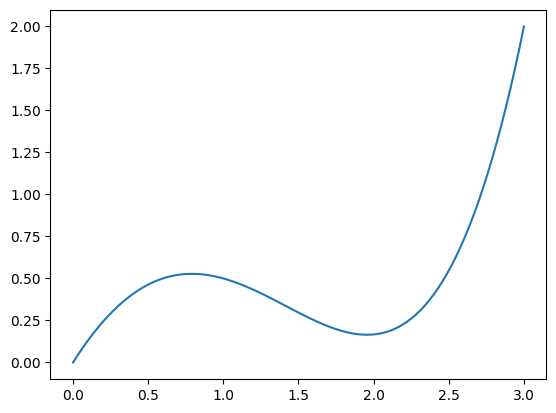

In [ ]:
def u_pp(x):
    return x**2 - 2

x1 = 0
x2 = 3
u1 = 0
u2 = 2

N = 100
x = np.linspace(x1, x2, N+1)
dx = x[1] - x[0]

M = np.diag(-2*np.ones(N+1), 0) + np.diag(np.ones(N), 1) + np.diag(np.ones(N), -1)
M[0, 0] = 1
M[0, 1] = 0
M[-1, -1] = 1
M[-1, -2] = 0

g = (u_pp(x))*dx**2
g[0] = u1
g[-1] = u2

M_inv = np.linalg.inv(M)
f = np.matmul(M_inv, g)
# f = M_inv @ g
# f = np.linalg.solve(M, g)
plt.plot(x, f)
plt.show()

### Ejercicio 3

Considere ahora la ecuación para una función $u(x)$, con sus condiciones de contorno

$$
u'' = 2 \\
u(0) = 0 \\
u(1) = 0 \\
$$

Piense a priori si se le ocurre cuál podría ser una solución, si tuviera que resolver analíticamente, pero sin hacerlo. Resuelva ahora con el método de diferencias finitas como el usado en el ejemplo anterior. [Hint: puede tener problemas con la dimensión de la función u_pp evaluada en x si no la define correctamente. Asegúrese que la salida de esta función tenga las mismas dimensiones que x, generando el vector de salida para que las tenga]


In [ ]:
# # # COMPLETAR

### Ejercicio 4

Elijamos ahora un problema del eje temático 1, de ODEs. Podemos intentar resolverlo con el método de diferencias finitas hacia adelante en una grilla de 100 puntos, con paso $h=0.01$, para una condición inicial. Busquen un problema y la manera de resolverlo para una condición inicial y comparen con lo esperado. Cómo tendríamos que plantear la matriz de diferenciación para que no sólo contenga la aproximación de la derivada, si no que también incorpore tanto términos que tengan dependencia con la variables como la condición inicial?

In [ ]:
# # # COMPLETAR

---
# Ecuaciones en derivadas parciales (PDEs)

Las PDEs involucran derivadas de una función con respecto a más de una variable independiente, a diferencia de las ODEs que tenían una única variable independiente. Entonces vamos a tener un campo escalar $u(x,t)$, que puede depender por ejemplo del tiempo y de una variable espacial. Para describir las derivadas parciales de $u(x,t)$ muchas veces se usa la siguiente notación $\frac{\partial u(x,t)}{\partial x} = u_x$.

Anteriormente, teníamos funciones univariadas, por lo que necesitábamos discretizar las derivadas sólo en esa variable, que podía ser por ejemplo tiempo o espacio. Cuando tenemos funciones multivariadas ahora tenemos derivadas tanto en el espacio como en el tiempo, por lo que necesitamos discretizar con respecto a ambas variables.

Podemos entonces pensar en un gráfico de *espacio-tiempo*, donde las coordenadas en la dirección vertical representan el avance en el tiempo (por ejemplo, de $t^n$ a $t^{n+1}$) y las coordenadas en la dirección horizontal se mueven en el espacio: los puntos consecutivos son $x_{i-1}$, $x_i$ y $x_{i+1}$. Esto crea una cuadrícula donde un punto tiene un índice tanto temporal como espacial. Aquí hay una representación gráfica de la cuadrícula espacio-temporal:

$$
\begin{matrix}
t^{n+1} & \rightarrow & \bullet && \bullet && \bullet \\
t^n & \rightarrow & \bullet && \bullet && \bullet \\
& & x_{i-1} && x_i && x_{i+1}
\end{matrix}
$$

Para la solución numérica de $u(x,t)$, usaremos subíndices para indicar la posición espacial, como $u_i$, y superíndices para indicar el instante temporal, como $u^n$. Luego etiquetaríamos la solución en el punto medio superior de la cuadrícula anterior de la siguiente manera:
$u^{n+1}_{i}$.

Cada punto de la cuadrícula a continuación tiene un índice $i$, que corresponde a la posición espacial y aumenta hacia la derecha, y un índice $n$, que corresponde al instante temporal y aumenta hacia arriba. Un segmento de cuadrícula pequeño tendría los siguientes valores de la solución numérica en cada punto:

$$
\begin{matrix}
& &\bullet & & \bullet & & \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & & \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & & \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}
$$

Otra forma de explicar nuestra cuadrícula de discretización es decir que está construida con pasos constantes en el tiempo y el espacio, $\Delta t$ y $\Delta x$, de la siguiente manera:

$$
\begin{eqnarray}
x_i &=& i\, \Delta x \quad \text{y} \quad t^n= n\, \Delta t \nonumber \\
u_i^n &=& u(i\, \Delta x, n\, \Delta t)
\end{eqnarray}
$$

# Métodos explícitos e implícitos

El método explícito y el método implícito son métodos de análisis numérico que se utilizan para resolver una ecuación diferencial dependiente del tiempo. Los términos **explícito** e **implícito** describen cómo se avanza en el tiempo en la solución numérica de una PDE, independientemente del método usado para aproximar derivadas. Así que, una vez que hemos aproximado las derivadas usando diferencias finitas, podemos elegir entre un esquema explícito o implícito para resolver la ecuación en el tiempo.

- **Método Explícito**: Calcula los valores futuros de la solución en función de los valores actuales, lo cual permite resolver directamente la ecuación en cada paso de tiempo sin resolver un sistema de ecuaciones.

- **Método Implícito**: Calcula los valores futuros de la solución en función de los valores actuales pero también de valores futuros. Esto hace que sea necesario resolver un sistema de ecuaciones en cada paso de tiempo para encontrar los valores en el siguiente paso temporal.


#### Diferencia entre métodos explícitos e implícitos

Los **métodos explícitos** son simples de implementar, pero su estabilidad es baja y requiere del uso de pasos chicos para evitar la divergencia. En problemas de difusión, por ejemplo, los métodos explícitos requieren que $\Delta t$ sea particularmente muy chico para asegurar la estabilidad.

Los **métodos implícitos** son altamente estables y convergen si se establecen los parámetros adecuados. Debido a su estabilidad, permiten mayores pasos de tiempo sin comprometer la precisión, por lo que pueden ser muy útiles para resolver ecuaciones que implican evoluciones extendidas en la variable tiempo. No obstante, requieren resolver un sistema de ecuaciones en cada paso de tiempo, lo cual puede ser computacionalmente muy costoso.

En la aplicación a PDEs, cada método tiene sus limitaciones y se ajusta mejor a ciertas ecuaciones o tipos de problemas:

- **Ecuaciones de Difusión** (como la del calor): Se pueden resolver tanto con métodos explícitos (aunque requieren pasos de tiempo pequeños para ser estables) como con métodos implícitos.

- **Ecuaciones de Onda**: En este caso, los métodos explícitos de diferencias finitas funcionan bien porque las soluciones suelen ser estables para pasos de tiempo razonables, aunque también se pueden usar métodos implícitos.

- **Ecuación de Poisson o Laplace**: Estas son ecuaciones elípticas, por lo que los métodos implícitos son necesarios. Inclusive, el método de diferencias finitas funciona mejor para geometrías simples. Para otros casos es ya directamente recomendable explorar otras estrategias.


**Ejemplo**

Para ilustrar cómo el método de diferencias finitas se combina con los métodos explícitos o implícitos, consideremos la **ecuación de difusión**:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

**Método de Diferencias Finitas en Esquema Explícito**: Si aplicamos diferencias finitas en el tiempo y en el espacio, podemos escribir:

$$
\frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} = \alpha \frac{u(x + \Delta x, t) - 2u(x, t) + u(x - \Delta x, t)}{(\Delta x)^2}
$$

Resolviendo para $u(x, t + \Delta t)$, obtenemos una expresión en función de los valores actuales, lo cual constituye un esquema explícito.

**Método de Diferencias Finitas en Esquema Implícito**: Si, en cambio, aplicamos diferencias finitas de modo que los valores en el lado derecho de la ecuación están evaluados en $t + \Delta t$, obtenemos un sistema de ecuaciones para $u(x, t + \Delta t)$, lo cual requiere resolver un sistema de ecuaciones para cada paso de tiempo.


---
# Aplicación a PDEs

## Ecuación de convección lineal 1D

La ecuación de convección lineal unidimensional es un caso bastante simple para estudiar la resolución numérica de ecuaciones en derivadas parciales. Se describe a partir de la siguiente expresión:

$$
\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{equation}
$$

La ecuación representa una *onda* que se propaga con velocidad $c$ en la dirección $x$, sin cambiar de forma. Por esa razón, a veces se la llama *ecuación de onda unidireccional* (a veces también *ecuación de advección*).

Con una condición inicial $u(x,0)=u_0(x)$, la ecuación tiene una solución exacta dada por:

$$
\begin{equation}
u(x,t)=u_0(x-ct)
\end{equation}
$$

Podemos ver que es solución de la ecuación tomando la derivada respecto del tiempo y del espacio y verificando que la ecuación se cumple.

De la solución exacta se pueden observar que su forma no cambia, siendo siempre la misma que la onda inicial, $u_0$, solo desplazada en la dirección $x$.


Veamos cómo discretizar la ecuación de convección lineal unidimensional tanto en el espacio como en el tiempo. Por definición, la derivada parcial con respecto al tiempo cambia solo con el tiempo y no con el espacio; su forma discretizada cambia solo los $n$ índices. De manera similar, la derivada parcial con respecto a $x$ cambia con el espacio, no con el tiempo, y solo se ven afectados los $i$ índices.

Discretizaremos la coordenada espacial $x$ en puntos indexados de $i=0$ a $N$, y luego avanzaremos en intervalos de tiempo discretos de tamaño $\Delta t$.

A partir de la definición de derivada (y simplemente eliminando el límite), sabemos que para $\Delta x$ suficientemente pequeño:

$$
\begin{equation}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation}
$$

Esta fórmula se puede aplicar en cualquier punto $x_i$. Pero tenga en cuenta que no es la única forma en que podemos estimar la derivada. La interpretación geométrica de la primera derivada $\partial u/ \partial x$ en cualquier punto es que representa la pendiente de la tangente a la curva $u(x)$. En el esquema a continuación, mostramos una línea de pendiente en $x_i$ y la marcamos como "exacta". Si la fórmula escrita anteriormente se aplica en $x_i$, aproxima la derivada utilizando el siguiente punto de la cuadrícula espacial: entonces se denomina fórmula de _diferencia hacia adelante_.

Pero, como se muestra en el esquema a continuación, también podríamos estimar la derivada espacial utilizando el punto detrás de $x_i$, en cuyo caso se llama _diferencia hacia atrás_. Incluso podríamos utilizar los dos puntos a cada lado de $x_i$ y obtener lo que se llama una _diferencia central_ (pero en ese caso el denominador sería $2\Delta x$).

## Ejercicio 5

Resuelvan la ecuación de convección lineal 1D con una condición inicial de *onda cuadrada*, definida de la siguiente manera:

$$
\begin{equation}
u(x,0)=\begin{cases}2 & \text{donde } 0.5\leq x \leq 1,\\
1 & \text{en cualquier otro lugar en } (0, 2)
\end{cases}
\end{equation}
$$

Considere como condición de contorno que sea $u=1$ en $x=0$. Nuestro dominio espacial para la solución numérica solo cubrirá el rango $x\in (0, 2)$.

Para esto creen una cuadrícula de puntos espaciados uniformemente dentro de nuestro dominio espacial. Defina también un paso en el tiempo, una cantidad de pasos, y un valor para la velocidad de la onda. Por simplicidad, use que $c=1$.

Qué observa qué pasa con la onda cuadrada?

In [ ]:
# # # COMPLETAR